In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings


plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (16,8)
plt.rc('font', family='Malgun Gothic')
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_csv("평균이용량_대여_반납.csv")
seoul = pd.read_csv("서울시_데이터종합(연면적sum,거주인구).csv", encoding = 'cp949')

# 서울시 평균이용량

In [3]:
df.head()

,대여소번호,총대여건수,총반납건수,총이용량,19년도총이용량,20년도총이용량,유지기간,일별평균이용량,일별대여평균이용량,일별반납평균이용량
0,101.0,14919.0,14714.0,29633.0,17607.0,12026.0,730.0,40.593151,20.436986,20.156164
1,102.0,59082.0,54010.0,113092.0,67430.0,45662.0,730.0,154.920548,80.934247,73.986301
2,103.0,40655.0,38358.0,79013.0,46153.0,32860.0,730.0,108.236986,55.691781,52.545205
3,104.0,34652.0,30358.0,65010.0,39840.0,25170.0,730.0,89.054795,47.468493,41.586301
4,105.0,20565.0,18317.0,38882.0,20860.0,18022.0,730.0,53.263014,28.171233,25.091781


In [4]:
df.describe()

,대여소번호,총대여건수,총반납건수,총이용량,19년도총이용량,20년도총이용량,유지기간,일별평균이용량,일별대여평균이용량,일별반납평균이용량
count,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000
mean,1300.999338,20075.628061,18305.033091,38380.661152,19327.982131,19052.679021,716.252151,65.408182,34.127892,31.280290
std,815.275728,17581.136413,16131.538867,33501.494135,17100.730083,17137.696889,88.329564,159.577072,82.369919,77.720766
min,101.000000,179.000000,161.000000,340.000000,9.000000,266.000000,19.000000,0.950685,0.583562,0.286301
25%,583.500000,9347.500000,7946.500000,17336.500000,8106.000000,8643.000000,730.000000,24.070548,12.857534,11.009589
50%,1229.000000,16168.000000,14644.000000,30573.000000,15138.000000,15155.000000,730.000000,42.406849,22.436986,20.246575
75%,1959.500000,25921.500000,24202.500000,50333.000000,25806.500000,24900.000000,730.000000,70.402740,36.439726,33.984932
max,3543.000000,317792.000000,201692.000000,505278.000000,218286.000000,286992.000000,914.000000,3648.250000,1917.150000,1731.100000


In [5]:
df.set_index(['대여소번호'], inplace=True)

In [6]:
# 이상한 값들 존재??
df.sort_values(by=['일별대여평균이용량'], ascending=False)

,총대여건수,총반납건수,총이용량,19년도총이용량,20년도총이용량,유지기간,일별평균이용량,일별대여평균이용량,일별반납평균이용량
대여소번호,,,,,,,,,
1124.0,38343.0,34622.0,72965.0,35963.0,37002.0,20.0,3648.250000,1917.150000,1731.100000
905.0,25550.0,27726.0,53276.0,25616.0,27660.0,19.0,2804.000000,1344.736842,1459.263158
152.0,114259.0,122056.0,236315.0,116086.0,120229.0,98.0,2411.377551,1165.908163,1245.469388
583.0,317792.0,187486.0,505278.0,218286.0,286992.0,914.0,1719.118865,1081.230971,637.887895
2348.0,25729.0,24968.0,50697.0,25849.0,24848.0,37.0,1370.189189,695.378378,674.810811
...,...,...,...,...,...,...,...,...,...
2286.0,1096.0,230.0,1326.0,710.0,616.0,730.0,1.816438,1.501370,0.315068
2395.0,866.0,554.0,1420.0,943.0,477.0,730.0,1.945205,1.186301,0.758904
2288.0,682.0,396.0,1078.0,650.0,428.0,730.0,1.476712,0.934247,0.542466


## 이상치 제거

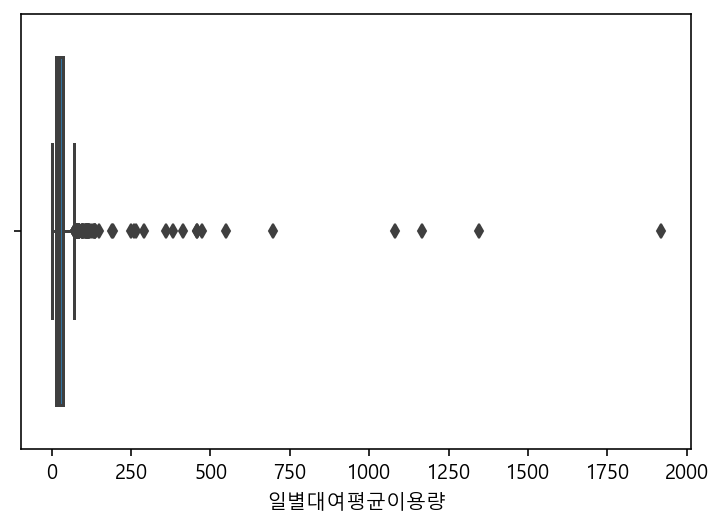

In [7]:
sns.boxplot(x = '일별대여평균이용량', data=df)
plt.show()

In [8]:
def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [9]:
# 너무 많다..?
outlier_index = get_outlier(df=df, column='일별대여평균이용량', weight=1.5)
len(outlier_index)

76

In [10]:
len(df[(df['유지기간'] < 365)|(df['유지기간'] > 730)])

29

In [11]:
index = df[(df['유지기간'] < 365)|(df['유지기간'] > 730)].index

In [12]:
df.drop(index, axis=0, inplace=True)
df

,총대여건수,총반납건수,총이용량,19년도총이용량,20년도총이용량,유지기간,일별평균이용량,일별대여평균이용량,일별반납평균이용량
대여소번호,,,,,,,,,
101.0,14919.0,14714.0,29633.0,17607.0,12026.0,730.0,40.593151,20.436986,20.156164
102.0,59082.0,54010.0,113092.0,67430.0,45662.0,730.0,154.920548,80.934247,73.986301
103.0,40655.0,38358.0,79013.0,46153.0,32860.0,730.0,108.236986,55.691781,52.545205
104.0,34652.0,30358.0,65010.0,39840.0,25170.0,730.0,89.054795,47.468493,41.586301
105.0,20565.0,18317.0,38882.0,20860.0,18022.0,730.0,53.263014,28.171233,25.091781
...,...,...,...,...,...,...,...,...,...
3538.0,11992.0,9568.0,21560.0,9306.0,12254.0,730.0,29.534247,16.427397,13.106849
3539.0,2457.0,2353.0,4810.0,1845.0,2965.0,730.0,6.589041,3.365753,3.223288
3541.0,56642.0,42544.0,99186.0,54554.0,44632.0,730.0,135.871233,77.591781,58.279452


# 서울시 지리정보

In [13]:
seoul

,Unnamed: 0,대여소번호,일별평균이용량,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이
0,0,502.0,534.895890,0.00,0.00,0.00,0.0,906.60,0.0,137575.50,0.00,137.510195,1430.131460,55.873032,59.208388,0.500000,24085,714.440640
1,1,207.0,489.505479,0.00,161.73,0.00,0.0,0.00,0.0,62279.03,0.00,209.972349,2254.225628,72.001620,31.257419,1.000000,15710,356.416445
2,2,583.0,346.080822,0.00,1932.80,0.00,0.0,4184.18,0.0,59977.04,0.00,233.562697,1087.731522,197.716089,47.019980,0.571429,30156,520.130672
3,3,3533.0,239.726027,0.00,5763.49,4697.48,0.0,0.00,0.0,1152.39,90429.46,161.743567,639.201940,175.855911,42.881442,0.000000,43626,549.726995
4,4,152.0,2411.377551,0.00,954.10,0.00,0.0,0.00,0.0,30110.49,0.00,99.606355,2534.786324,899.273615,53.992085,0.500000,21319,739.718938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506,1506,2287.0,0.950685,0.00,3830.38,0.00,0.0,0.00,0.0,4749.01,0.00,187.100314,5396.477786,3469.661173,272.330166,7.444444,8164,749.655227
1507,1507,2391.0,1.094521,0.00,0.00,0.00,0.0,0.00,0.0,3456.00,0.00,366.727904,4119.802431,1206.457463,144.812218,4.500000,14769,345.607938
1508,1508,465.0,4.533170,0.00,6864.08,0.00,0.0,0.00,0.0,527.37,0.00,377.608155,301.960064,1245.792726,167.833245,6.250000,1224,424.978106
1509,1509,2394.0,12.592593,0.00,497.02,0.00,0.0,0.00,0.0,24433.85,3972.08,391.074591,3647.481395,912.623704,81.394004,1.000000,14769,256.770601


In [14]:
seoul.drop(['Unnamed: 0','일별평균이용량'], axis=1,inplace=True)
seoul.set_index(['대여소번호'], inplace=True)

In [15]:
seoul.drop(index, axis=0, inplace=True)

In [16]:
seoul

,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이
대여소번호,,,,,,,,,,,,,,,
502.0,0.00,0.00,0.00,0.0,906.60,0.0,137575.50,0.00,137.510195,1430.131460,55.873032,59.208388,0.500000,24085,714.440640
207.0,0.00,161.73,0.00,0.0,0.00,0.0,62279.03,0.00,209.972349,2254.225628,72.001620,31.257419,1.000000,15710,356.416445
3533.0,0.00,5763.49,4697.48,0.0,0.00,0.0,1152.39,90429.46,161.743567,639.201940,175.855911,42.881442,0.000000,43626,549.726995
1210.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,324.671476,2761.514679,145.087355,70.406036,0.333333,24052,348.694407
1308.0,39658.62,27219.63,552.09,0.0,3227.37,0.0,8097.88,0.00,332.366534,749.646476,408.450803,12.103377,1.250000,41364,1258.678353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664.0,61560.86,0.00,7622.29,0.0,0.00,0.0,0.00,0.00,332.212513,88.481654,592.515746,370.864704,2.000000,8727,0.000000
2287.0,0.00,3830.38,0.00,0.0,0.00,0.0,4749.01,0.00,187.100314,5396.477786,3469.661173,272.330166,7.444444,8164,749.655227
2391.0,0.00,0.00,0.00,0.0,0.00,0.0,3456.00,0.00,366.727904,4119.802431,1206.457463,144.812218,4.500000,14769,345.607938


In [17]:
seoul.describe()

,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이
count,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000,1482.000000
mean,3686.735241,10096.060853,743.424221,1182.886554,16465.326142,842.024818,23334.485326,4231.602111,290.477261,1870.361847,521.987561,76.500098,2.034729,22249.354926,677.691785
std,9560.344792,15435.550885,6090.966182,7154.885876,38677.334589,4479.668859,36736.725500,21656.800914,233.525713,1220.282469,493.386122,67.064347,1.975251,11898.353476,332.837863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.671952,35.849532,8.101798,4.160543,0.000000,823.000000,0.000000
25%,0.000000,945.362500,0.000000,0.000000,0.000000,0.000000,1819.842500,0.000000,149.677980,890.891096,187.035225,32.387105,0.500000,13495.750000,397.108553
50%,0.000000,6518.945000,0.000000,0.000000,932.075000,0.000000,14028.200000,0.000000,238.161879,1576.901047,430.370745,56.922104,1.500000,20344.000000,650.992425
75%,2528.460000,15099.192500,0.000000,0.000000,12699.167500,0.000000,31786.060000,0.000000,358.232759,2694.659675,684.744470,98.494479,2.800000,29011.500000,907.027071
max,97224.140000,290322.233100,165703.130000,138776.470000,345374.860000,85686.680000,703906.740000,340913.780000,1962.137084,6782.377213,4204.445392,557.954108,13.750000,80847.000000,2098.452944


# 최종 데이터

In [18]:
total = seoul.join(df[['일별대여평균이용량']], how='left')

In [19]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1482 entries, 502.0 to 3543.0
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   교육시설_sum      1482 non-null   float64
 1   근린생활시설_sum    1482 non-null   float64
 2   문화시설_sum      1482 non-null   float64
 3   숙박시설_sum      1482 non-null   float64
 4   업무시설_sum      1482 non-null   float64
 5   의료시설_sum      1482 non-null   float64
 6   주거시설_sum      1482 non-null   float64
 7   판매시설_sum      1482 non-null   float64
 8   공원_distance   1482 non-null   float64
 9   대학교_distance  1482 non-null   float64
 10  지하철_distance  1482 non-null   float64
 11  버스_distance   1482 non-null   float64
 12  경사도_mean      1482 non-null   float64
 13  거주인구          1482 non-null   int64  
 14  도로길이          1482 non-null   float64
 15  일별대여평균이용량     1482 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 229.1 KB


# 회귀분석

## 스케일링

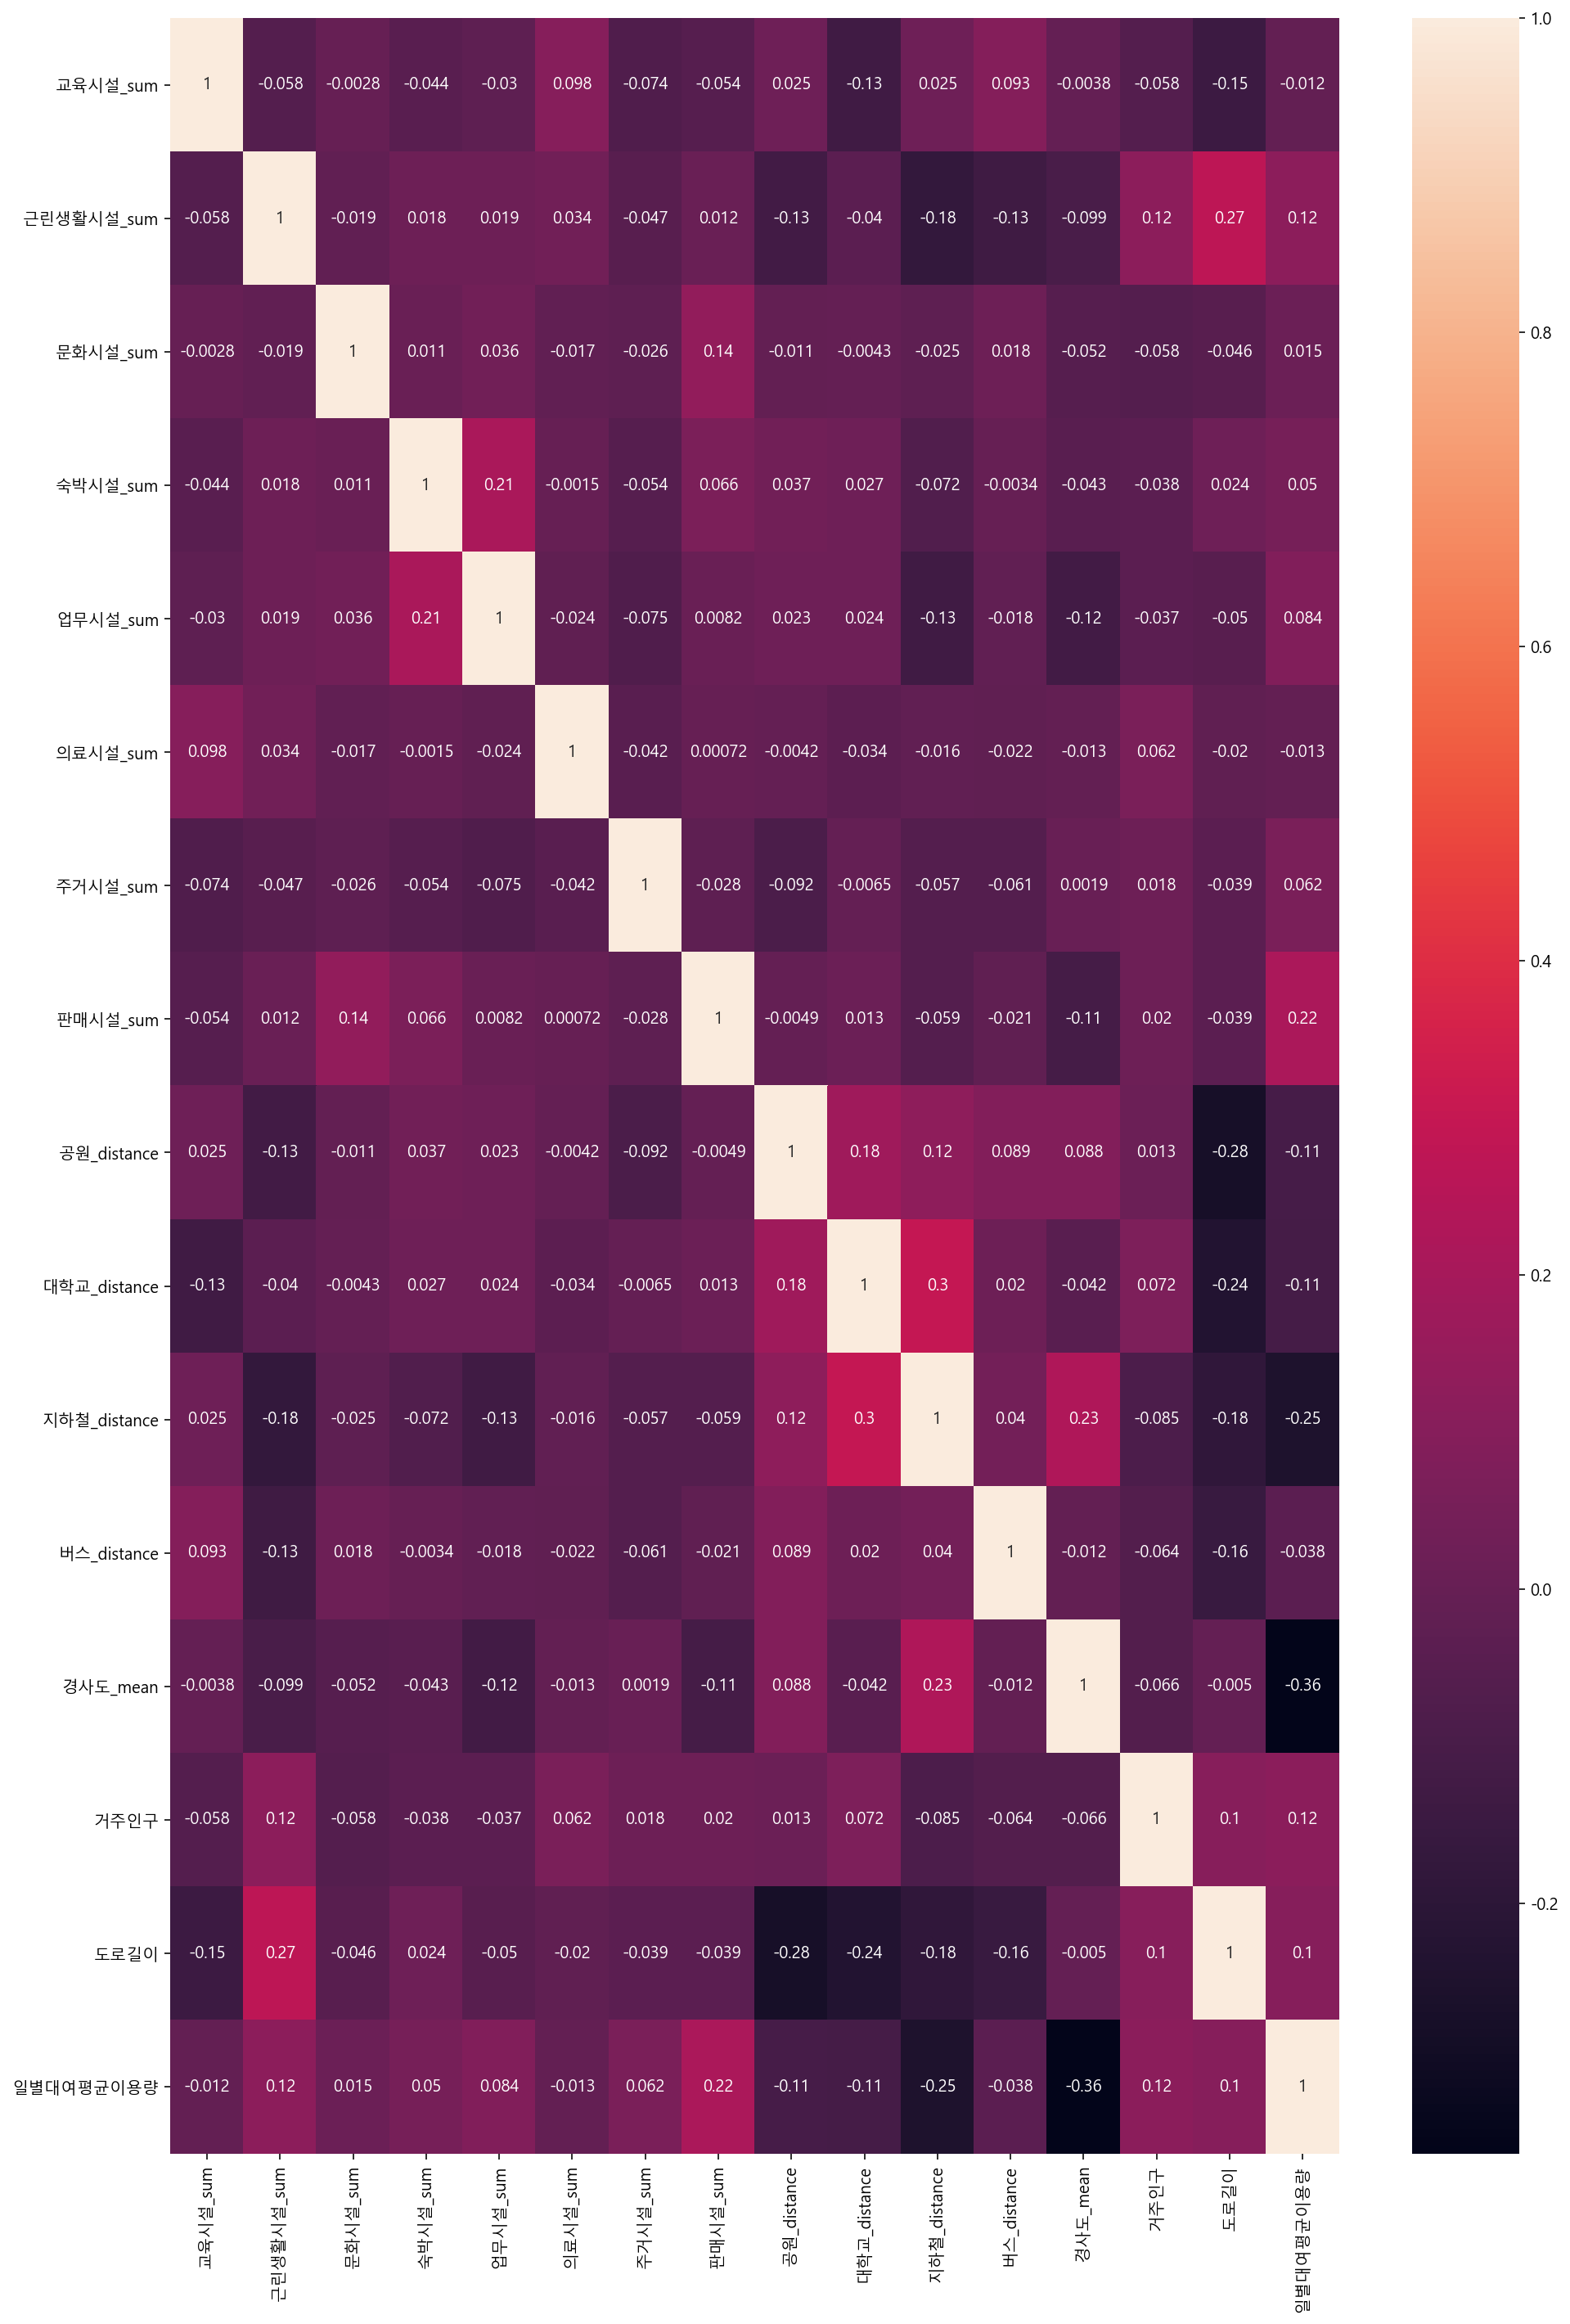

In [20]:
plt.figure(figsize=(16,24))
sns.heatmap(total.corr(), annot=True)

In [47]:
from patsy import dmatrix, dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

y, X = dmatrices('일별대여평균이용량 ~ 교육시설_sum + 근린생활시설_sum + 문화시설_sum + 숙박시설_sum + 업무시설_sum + 의료시설_sum + 주거시설_sum + 판매시설_sum + 공원_distance + 대학교_distance + 지하철_distance + 버스_distance + 경사도_mean + 거주인구 + 도로길이', data=total, return_type = "dataframe")
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,22.0,Intercept
1,1.1,교육시설_sum
2,1.1,근린생활시설_sum
3,1.0,문화시설_sum
4,1.1,숙박시설_sum
5,1.1,업무시설_sum
6,1.0,의료시설_sum
7,1.0,주거시설_sum
8,1.0,판매시설_sum
9,1.1,공원_distance


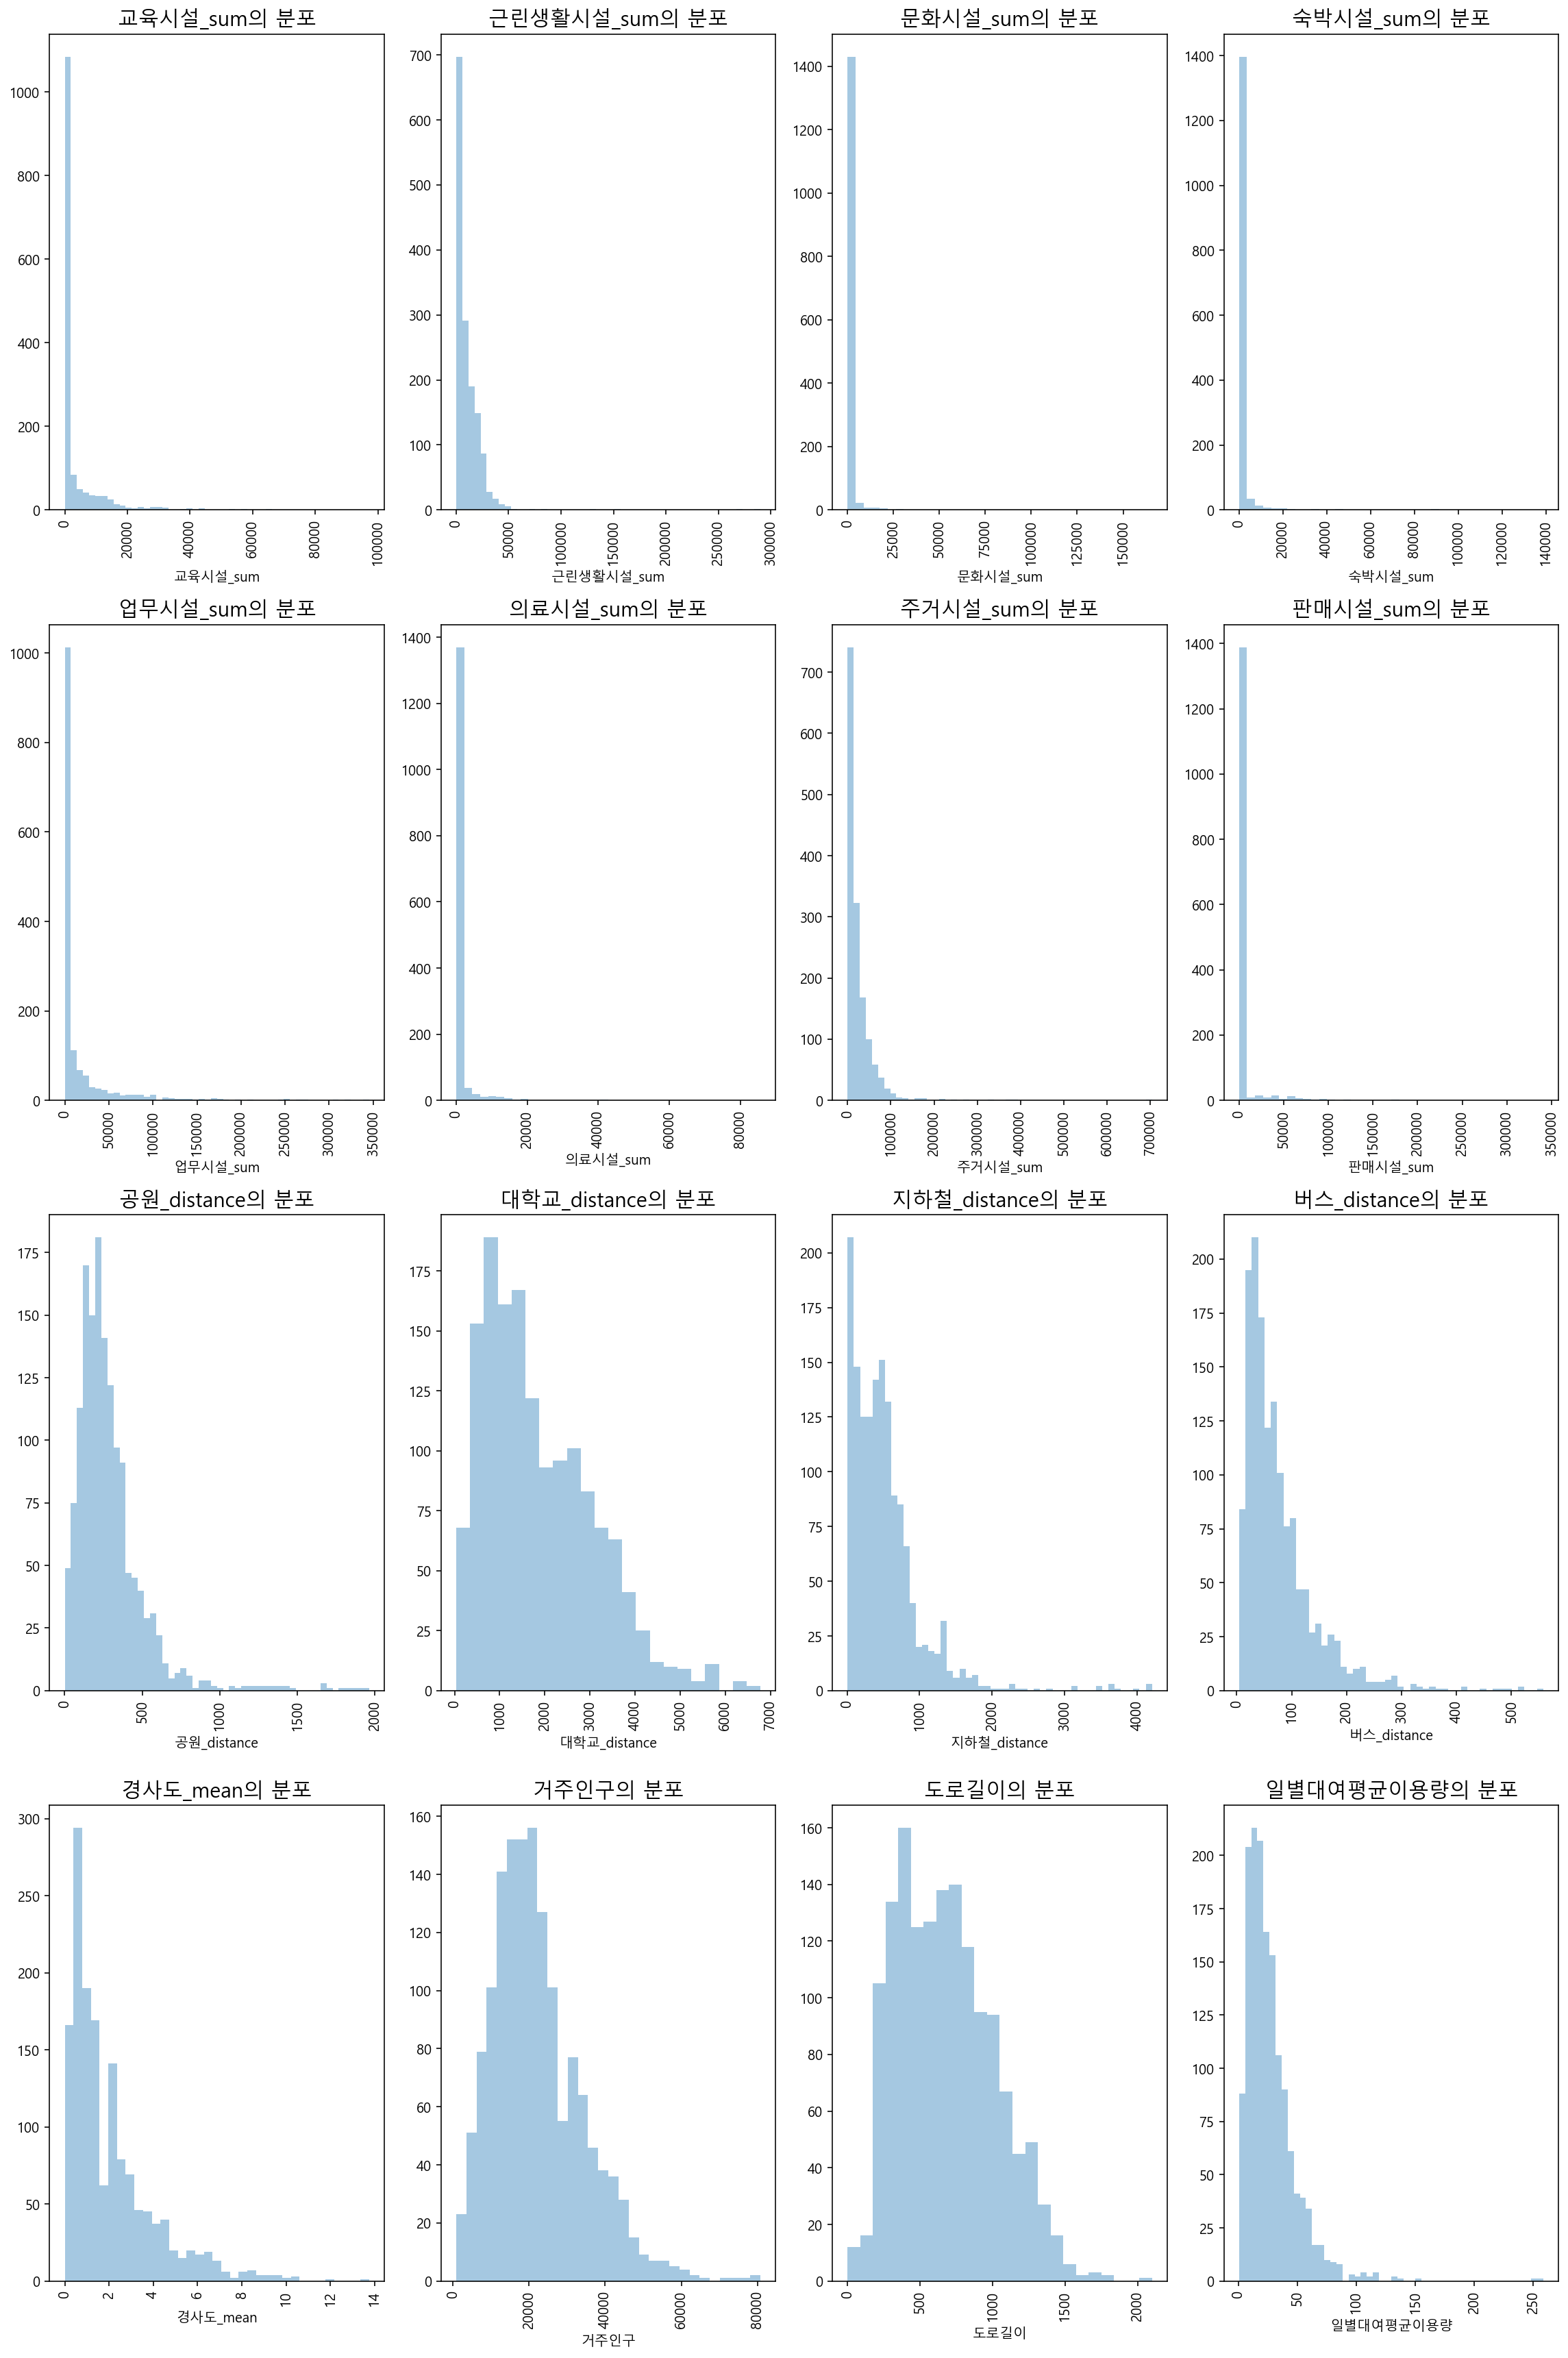

In [22]:
plt.figure(figsize=(16,24)) # 먼저 창을 만들고
n=1
for feature in total.columns:
    ax = plt.subplot(4,4,n) # for문을 돌면서 Axes를 추가
    plt.title('%s의 분포' %feature, fontsize=15)
    sns.distplot(total[feature], kde =False)
    plt.xticks(rotation=90)
    n+=1
plt.tight_layout()  # 창 크기에 맞게 조정
plt.show()

In [23]:
from scipy.stats import skew

features_index = total.dtypes[total.dtypes != 'object'].index
skew_features = total[features_index].apply(lambda x : skew(x))
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

문화시설_sum        17.913397
숙박시설_sum        11.841145
의료시설_sum        10.670393
판매시설_sum         9.106897
근린생활시설_sum       8.937168
주거시설_sum         7.143945
교육시설_sum         4.636081
업무시설_sum         4.076714
지하철_distance     2.959794
일별대여평균이용량        2.951318
공원_distance      2.918526
버스_distance      2.488875
경사도_mean         1.710297
dtype: float64


In [24]:
total_log = total.copy()

In [25]:
total_log[skew_features_top.index] = np.log1p(total[skew_features_top.index])
total_log

,교육시설_sum,근린생활시설_sum,문화시설_sum,숙박시설_sum,업무시설_sum,의료시설_sum,주거시설_sum,판매시설_sum,공원_distance,대학교_distance,지하철_distance,버스_distance,경사도_mean,거주인구,도로길이,일별대여평균이용량
대여소번호,,,,,,,,,,,,,,,,
502.0,0.000000,0.000000,0.000000,0.0,6.810804,0.0,11.831935,0.000000,4.930944,1430.131460,4.040821,4.097812,0.405465,24085,714.440640,5.559163
207.0,0.000000,5.092092,0.000000,0.0,0.000000,0.0,11.039396,0.000000,5.351727,2254.225628,4.290482,3.473748,0.693147,15710,356.416445,5.529168
3533.0,0.000000,8.659472,8.454994,0.0,0.000000,0.0,7.050461,11.412336,5.092176,639.201940,5.175335,3.781491,0.000000,43626,549.726995,4.914326
1210.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,5.785889,2761.514679,4.984205,4.268382,0.287682,24052,348.694407,4.897973
1308.0,10.588089,10.211730,6.315521,0.0,8.079733,0.0,8.999481,0.000000,5.809243,749.646476,6.014817,2.572870,0.810930,41364,1258.678353,4.772216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664.0,11.027798,0.000000,8.938963,0.0,0.000000,0.0,0.000000,0.000000,5.808780,88.481654,6.386064,5.918530,1.098612,8727,0.000000,2.191750
2287.0,0.000000,8.250980,0.000000,0.0,0.000000,0.0,8.465902,0.000000,5.236975,5396.477786,8.152100,5.610680,2.133509,8164,749.655227,0.509455
2391.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,8.148156,0.000000,5.907343,4119.802431,7.096272,4.982320,1.704748,14769,345.607938,0.459677


In [26]:
#log변환 후 minmaxscaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(total_log)
total_log_scaled = scaler.transform(total_log)
total_log_scaled = pd.DataFrame(total_log_scaled, columns=total_log.columns, index=list(total_log.index.values))

In [56]:
#log변환 후 robustscaler
from sklearn.preprocessing import RobustScaler

robustScaler = RobustScaler()
robustScaler.fit(total_log)
total_log_robustScaled = robustScaler.transform(total_log)
total_log_robustScaled = pd.DataFrame(total_log_robustScaled, columns=total_log.columns, index=list(total_log.index.values))

## Sklearn

In [27]:
from sklearn.model_selection import train_test_split

y_target = total_log_scaled['일별대여평균이용량']
X_features = total_log_scaled.drop('일별대여평균이용량', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_regr(y,pred):
    mse = mean_squared_error(y,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y,pred)
    r2 = r2_score(y,pred)
    print('MSE 값: {0:.3f}, RMSE 값: {1:.3f}, MAE 값: {2:.3f}, R2 값: {3:.3f}'.format(mse,rmse,mae,r2))

In [29]:
def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)
    print('###', model.__class__.__name__,'###')
    evaluate_regr(y_test, pred)

In [30]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression,ElasticNet

ridge = Ridge()
lasso = Lasso()
lr = LinearRegression()
en = ElasticNet()

for model in [lr, ridge, lasso, en]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
MSE 값: 0.038, RMSE 값: 0.194, MAE 값: 0.155, R2 값: 0.345
### Ridge ###
MSE 값: 0.038, RMSE 값: 0.194, MAE 값: 0.156, R2 값: 0.344
### Lasso ###
MSE 값: 0.058, RMSE 값: 0.241, MAE 값: 0.190, R2 값: -0.010
### ElasticNet ###
MSE 값: 0.058, RMSE 값: 0.241, MAE 값: 0.190, R2 값: -0.010


### 파라미터 조정

In [31]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid = params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_train, y_train)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print('{0} 5 CV시 최적 평균 RMSE 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__, np.round(rmse,4),grid_model.best_params_))

In [32]:
Ridge_alp_list=[]
alp = np.arange(0,100,0.01)
for i in alp:
    Ridge_alp_list.append(round(i,2))
    
Lasso_alp_list=[]
alp = np.arange(0,1,0.01)
for i in alp:
    Lasso_alp_list.append(round(i,2))

In [33]:
ridge_params = {'alpha':Ridge_alp_list}
lasso_params = {'alpha':Lasso_alp_list}
en_params = {'alpha':Ridge_alp_list, 'l1_ratio':Lasso_alp_list}

In [34]:
print_best_params(ridge, ridge_params)

Ridge 5 CV시 최적 평균 RMSE 값:0.1154, 최적 alpha:{'alpha': 1.62}


In [35]:
print_best_params(lasso, lasso_params)

Lasso 5 CV시 최적 평균 RMSE 값:0.1155, 최적 alpha:{'alpha': 0.0}


In [36]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression,ElasticNet

ridge = Ridge(alpha=1.62)
lasso = Lasso(alpha=0)
lr = LinearRegression()

for model in [lr, ridge, lasso, en]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)

### LinearRegression ###
MSE 값: 0.038, RMSE 값: 0.194, MAE 값: 0.155, R2 값: 0.345
### Ridge ###
MSE 값: 0.038, RMSE 값: 0.195, MAE 값: 0.156, R2 값: 0.343
### Lasso ###
MSE 값: 0.038, RMSE 값: 0.194, MAE 값: 0.155, R2 값: 0.345
### ElasticNet ###
MSE 값: 0.058, RMSE 값: 0.241, MAE 값: 0.190, R2 값: -0.010


## Statsmodels

In [37]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [38]:
#OLS검정
#total_log_minmaxscaled
ols = smf.ols(formula = '일별대여평균이용량 ~ 교육시설_sum + 근린생활시설_sum + 문화시설_sum + 숙박시설_sum + 업무시설_sum + 의료시설_sum + 주거시설_sum + 판매시설_sum + 공원_distance + 대학교_distance + 지하철_distance + 버스_distance + 경사도_mean + 거주인구 + 도로길이', data = total_log_scaled)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              일별대여평균이용량   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     53.20
Date:                Mon, 27 Sep 2021   Prob (F-statistic):          1.19e-126
Time:                        20:19:39   Log-Likelihood:                 1116.4
No. Observations:                1482   AIC:                            -2201.
Df Residuals:                    1466   BIC:                            -2116.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6548      0.028     23.005      0.000       0.599       0.711
교육시설_sum        -0.0058      0.008     -0.683      0.494      -0.022       0.011
근린생활시설_sum       0.0151      0.015      1.037      0.300      -0.013       0.044
문화시설_sum         0.0227      0.016      1.379      0.168      -0.010       0.055
숙박시설_sum        -0.0122      0.014     -0.902      0.367      -0.039       0.014
업무시설_sum         0.0489      0.009      5.502      0.000       0.031       0.066
의료시설_sum        -0.0310      0.013     -2.320      0.020      -0.057      -0.005
주거시설_sum         0.0090      0.012      0.732      0.464      -0.015       0.033
판매시설_sum         0.0257      0.012      2.141      0.032       0.002       0.049
공원_distance     -0.0074      0.027     -0.275      0.784      -0.060       0.045
대학교_distance    -0.1275      0.018     -7.221      0.000      -0.162      -0.093
지하철_distance    -0.1193      0.019     -6.186      0.000      -0.157      -0.081
버스_distance     -0.0024      0.018     -0.132      0.895      -0.038       0.033
경사도_mean        -0.2886      0.015    -19.853      0.000      -0.317      -0.260
거주인구             0.0857      0.021      4.171      0.000       0.045       0.126
도로길이             0.0580      0.024      2.415      0.016       0.011       0.105
==============================================================================
Omnibus:                        3.301   Durbin-Watson:                   0.738
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                3.652
Skew:                          -0.006   Prob(JB):                        0.161
Kurtosis:                       3.243   Cond. No.                         23.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
#OLS검정
#total_log_robustscaled
ols = smf.ols(formula = '일별대여평균이용량 ~ 교육시설_sum + 근린생활시설_sum + 문화시설_sum + 숙박시설_sum + 업무시설_sum + 의료시설_sum + 주거시설_sum + 판매시설_sum + 공원_distance + 대학교_distance + 지하철_distance + 버스_distance + 경사도_mean + 거주인구 + 도로길이', data = total_log_robustScaled)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              일별대여평균이용량   R-squared:                       0.352
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     53.20
Date:                Mon, 27 Sep 2021   Prob (F-statistic):          1.19e-126
Time:                        20:49:40   Log-Likelihood:                -1340.0
No. Observations:                1482   AIC:                             2712.
Df Residuals:                    1466   BIC:                             2797.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0189      0.027      0.688      0.492      -0.035       0.073
교육시설_sum        -0.0207      0.030     -0.683      0.494      -0.080       0.039
근린생활시설_sum       0.0174      0.017      1.037      0.300      -0.016       0.050
문화시설_sum         0.0099      0.007      1.379      0.168      -0.004       0.024
숙박시설_sum        -0.0054      0.006     -0.902      0.367      -0.017       0.006
업무시설_sum         0.1900      0.035      5.502      0.000       0.122       0.258
의료시설_sum        -0.0143      0.006     -2.320      0.020      -0.026      -0.002
주거시설_sum         0.0101      0.014      0.732      0.464      -0.017       0.037
판매시설_sum         0.0106      0.005      2.141      0.032       0.001       0.020
공원_distance     -0.0051      0.019     -0.275      0.784      -0.041       0.031
대학교_distance    -0.1788      0.025     -7.221      0.000      -0.227      -0.130
지하철_distance    -0.1320      0.021     -6.186      0.000      -0.174      -0.090
버스_distance     -0.0029      0.022     -0.132      0.895      -0.046       0.040
경사도_mean        -0.5229      0.026    -19.853      0.000      -0.575      -0.471
거주인구             0.0872      0.021      4.171      0.000       0.046       0.128
도로길이             0.0739      0.031      2.415      0.016       0.014       0.134
==============================================================================
Omnibus:                        3.301   Durbin-Watson:                   0.738
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                3.652
Skew:                          -0.006   Prob(JB):                        0.161
Kurtosis:                       3.243   Cond. No.                         9.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 유의하지 않은 변수 제거

In [40]:
ols = smf.ols(formula = '일별대여평균이용량 ~ 업무시설_sum + 의료시설_sum + 판매시설_sum + 대학교_distance + 지하철_distance + 경사도_mean + 거주인구 + 도로길이', data = total_log_scaled)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              일별대여평균이용량   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     99.17
Date:                Mon, 27 Sep 2021   Prob (F-statistic):          4.45e-132
Time:                        20:23:16   Log-Likelihood:                 1113.7
No. Observations:                1482   AIC:                            -2209.
Df Residuals:                    1473   BIC:                            -2162.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.6560      0.017     39.274      0.000       0.623       0.689
업무시설_sum         0.0507      0.008      6.092      0.000       0.034       0.067
의료시설_sum        -0.0307      0.013     -2.317      0.021      -0.057      -0.005
판매시설_sum         0.0263      0.012      2.212      0.027       0.003       0.050
대학교_distance    -0.1300      0.017     -7.501      0.000      -0.164      -0.096
지하철_distance    -0.1195      0.019     -6.233      0.000      -0.157      -0.082
경사도_mean        -0.2888      0.014    -20.039      0.000      -0.317      -0.261
거주인구             0.0847      0.020      4.151      0.000       0.045       0.125
도로길이             0.0752      0.020      3.764      0.000       0.036       0.114
==============================================================================
Omnibus:                        3.800   Durbin-Watson:                   0.735
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                4.222
Skew:                          -0.033   Prob(JB):                        0.121
Kurtosis:                       3.253   Cond. No.                         11.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
#OLS검정
#total_log_robustscaled
ols = smf.ols(formula = '일별대여평균이용량 ~ 업무시설_sum + 의료시설_sum + 판매시설_sum + 대학교_distance + 지하철_distance + 경사도_mean + 거주인구 + 도로길이', data = total_log_robustScaled)
result = ols.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              일별대여평균이용량   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     99.17
Date:                Mon, 27 Sep 2021   Prob (F-statistic):          4.45e-132
Time:                        20:51:16   Log-Likelihood:                -1342.7
No. Observations:                1482   AIC:                             2703.
Df Residuals:                    1473   BIC:                             2751.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0030      0.020     -0.146      0.884      -0.043       0.037
업무시설_sum         0.1970      0.032      6.092      0.000       0.134       0.260
의료시설_sum        -0.0142      0.006     -2.317      0.021      -0.026      -0.002
판매시설_sum         0.0108      0.005      2.212      0.027       0.001       0.020
대학교_distance    -0.1823      0.024     -7.501      0.000      -0.230      -0.135
지하철_distance    -0.1322      0.021     -6.233      0.000      -0.174      -0.091
경사도_mean        -0.5233      0.026    -20.039      0.000      -0.575      -0.472
거주인구             0.0861      0.021      4.151      0.000       0.045       0.127
도로길이             0.0959      0.025      3.764      0.000       0.046       0.146
==============================================================================
Omnibus:                        3.800   Durbin-Watson:                   0.735
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                4.222
Skew:                          -0.033   Prob(JB):                        0.121
Kurtosis:                       3.253   Cond. No.                         8.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""